In [1]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plot
from collections import deque

In [10]:
def search_algo(graph, start_node, algo='DFS', goal='9'):
    visited = set()
    # queue = [start.node]
    q = deque()
    # use queue, stack or heap based on chosen algorithm
    if algo == 'BFS':
        popfunction = q.popleft # FIFO queue
    elif algo == 'DFS':
        popfunction = q.pop # LIFO stack
        
    q.append(start_node)
    
    while len(q) > 0:
        node = popfunction()
        visited.add(node)

        print(node)
        
        if node == goal:
            print('The target has been reached!')
            break
        else:
            for next in graph.edges([node]):
                if next[1] not in visited:
                    q.append(next[1])

1
4
7
3
6
10
2
5
9
The target has been reached


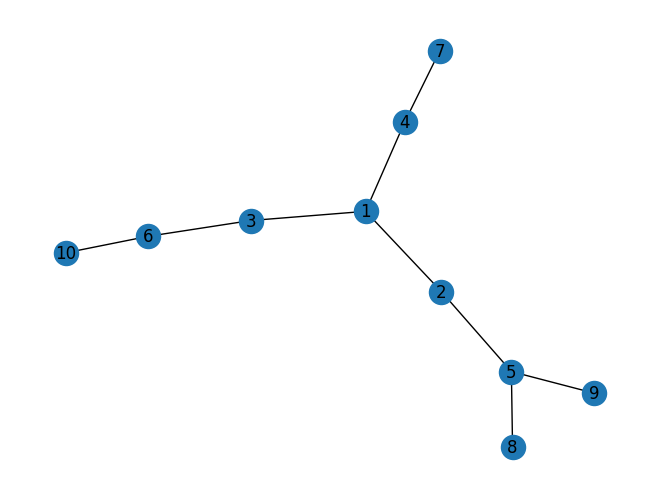

In [11]:
graph = nx.Graph({
    '1': ['2', '3', '4'],
    '2': ['5'],
    '3': ['6'],
    '4': ['7'],
    '5': ['8', '9'],
    '6': ['10'],
    '7': [],
    '8': [],
    '9': [],
    '10': []
})

nx.draw(graph, with_labels=True)

search_algo(graph, '1')